# EE769 Assignment-3
Mirza Aman Baig(213230007)  
Rohan Appaso More(213230013)

**Question No. 4**

Visualize and train kernal PCA and finding explained variance

Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable  
In this question we will first try to visualize the data and take insights about the next operations to be performed on dataset  
Then we will tarin the KPCA model and find explained variance for KPCA

In [1]:
#importing some important useful libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing training data
train_df = pd.read_csv("DataKPCA.csv")

In [3]:
train_df.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [4]:
print(train_df.shape)

(190, 7)


In [5]:
#checking the unique values
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + " is of type " + str(train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(train_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

x1 is of type float64 has 190 unique values, and 0 null entries
x2 is of type float64 has 190 unique values, and 0 null entries
x3 is of type float64 has 190 unique values, and 0 null entries
x4 is of type float64 has 190 unique values, and 0 null entries
x5 is of type float64 has 190 unique values, and 0 null entries
x6 is of type float64 has 190 unique values, and 0 null entries
x7 is of type float64 has 190 unique values, and 0 null entries


In [6]:
# collection of numeric type features into num_df dataframe
num_df = train_df.select_dtypes(include=['int64','float64']).copy()
num_df.head(2)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974


**Visualizing the Data**

In [7]:
num_df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


We can see here standard deviation is higher for x3 and x4 column

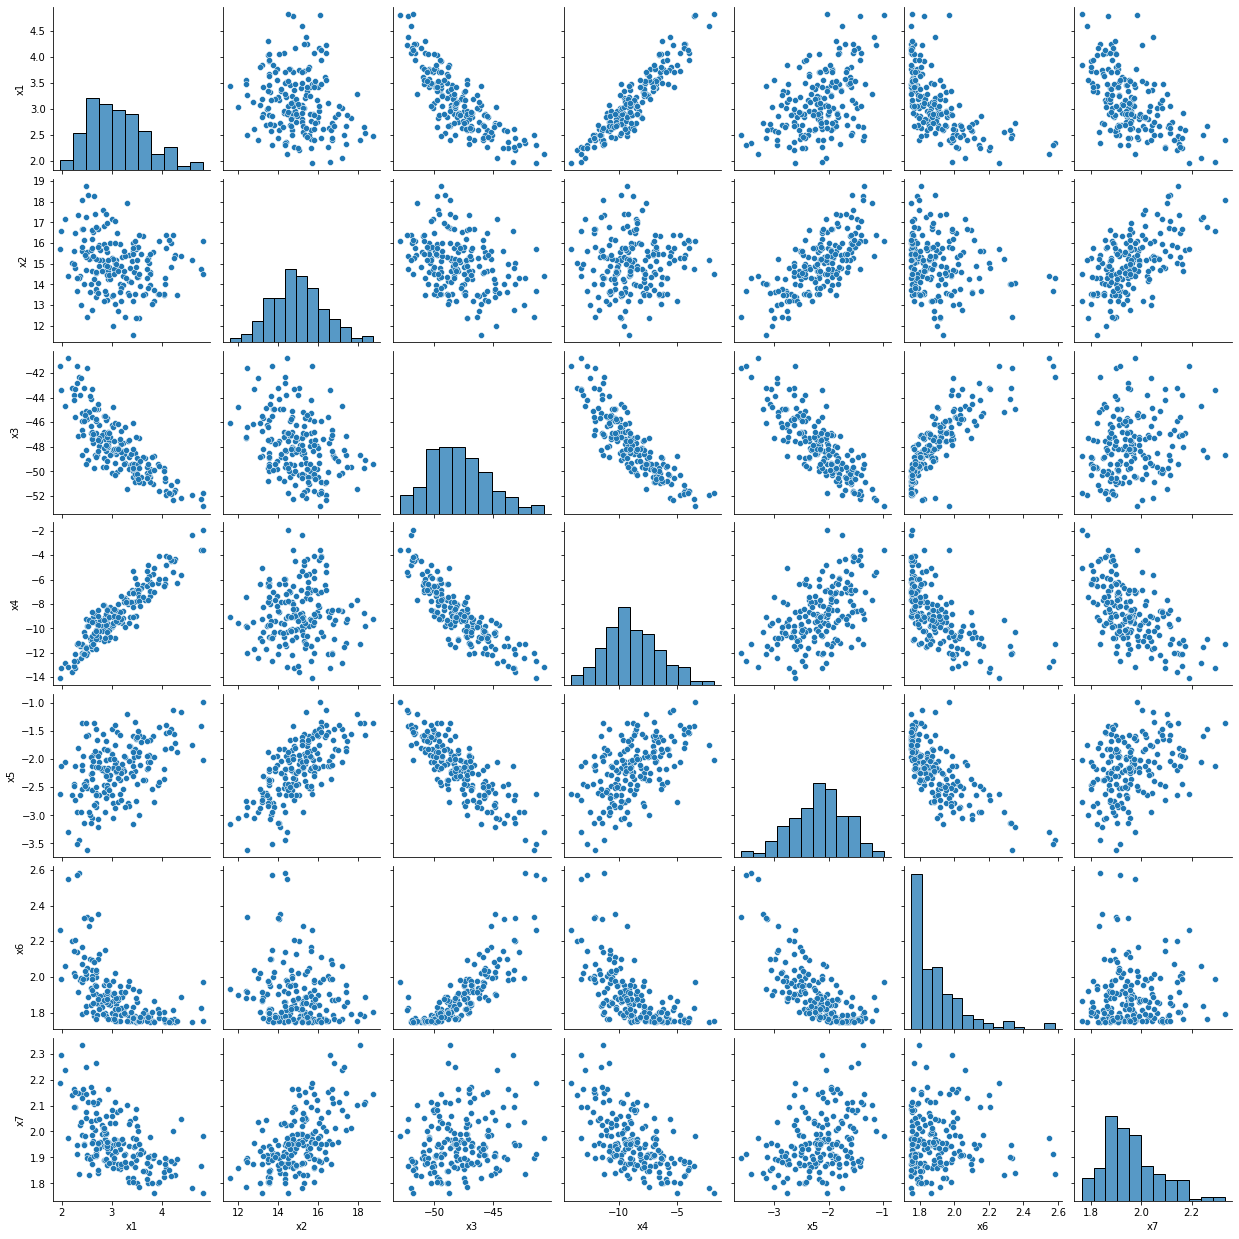

In [8]:
sns.pairplot(num_df)

The pairplot for the given data looks perfect but we need to scale the dataset before applying KPCA

**Training the KPCA Model**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(num_df, test_size=0.2, random_state=42)

In [10]:
#
# Scale the dataset; This is very important before you apply KPCA
#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
#
# Instantiate KPCA
#
kpca = KernelPCA(n_components=10, kernel='linear')
#
# Determine transformed features
#
X_train_kpca = kpca.fit_transform(X_train_std)

In [12]:
#
# Determine explained variance using explained_variance_ration_ attribute
#
explained_variance = np.var(X_train_kpca, axis=0)
exp_var_kpca= explained_variance / np.sum(explained_variance)
# exp_var_kpca = kpca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_kpca)


 **Variance explained versus KPCA**

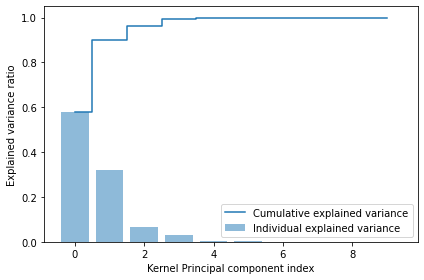

In [13]:
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_kpca)), exp_var_kpca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Kernel Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The above plot is for variance explained versus KPCA dimensions for up to 10 dimensions. 

In [14]:
exp_var_kpca

array([0.58032948, 0.31899072, 0.06460006, 0.02875949, 0.00451215,
       0.00195735, 0.00085074, 0.        , 0.        , 0.        ])

From the above graph of explained variance versus kernel PCA we can see that almost 99% of variance is shown by 4 principal components  
First components shows 58% of variance, second shows 32% of variance and third shows 6% of and fourth accounts for 3%